In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df =pd.read_csv(r'C:\Users\Asus\Documents\portfolio\portfolio project 2\uber_stock.csv')

In [6]:
df.head()

,date,open_price,high_price,low_price,close_price,daily_volume
0,5/10/2019,42.00,45.00,41.06,41.57,186322500
1,5/13/2019,38.79,39.24,36.08,37.10,79442400
2,5/14/2019,38.31,39.96,36.85,39.96,46661100
3,5/15/2019,39.37,41.88,38.95,41.29,36086100
4,5/16/2019,41.48,44.06,41.25,43.00,38115500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          725 non-null    object 
 1   open_price    725 non-null    float64
 2   high_price    725 non-null    float64
 3   low_price     725 non-null    float64
 4   close_price   725 non-null    float64
 5   daily_volume  725 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 34.1+ KB


In [8]:
df.describe()

,open_price,high_price,low_price,close_price,daily_volume
count,725.000000,725.000000,725.000000,725.000000,7.250000e+02
mean,40.166455,40.961683,39.261255,40.107255,2.472855e+07
std,9.198945,9.259165,9.075828,9.141862,1.691406e+07
min,15.960000,17.800000,13.710000,14.820000,3.380000e+06
25%,32.730000,33.420000,31.980000,32.800000,1.423060e+07
50%,39.000000,39.960000,38.010000,38.810000,2.079540e+07
75%,46.700000,47.520000,45.860000,46.420000,3.011960e+07
max,63.250000,64.050000,60.800000,63.180000,1.863225e+08


In [10]:
df.isnull().sum()

date            0
open_price      0
high_price      0
low_price       0
close_price     0
daily_volume    0
dtype: int64

In [13]:
df["date"] =pd.to_datetime(df["date"])
df.dtypes

date            datetime64[ns]
open_price             float64
high_price             float64
low_price              float64
close_price            float64
daily_volume             int64
dtype: object

In [14]:
for col in ["open_price", "high_price", "low_price", "close_price"]:
    print(col, (df[col] < 0).sum())


open_price 0
high_price 0
low_price 0
close_price 0


In [15]:
df[(df["high_price"] < df["open_price"]) | (df["open_price"] < df["low_price"])]


,date,open_price,high_price,low_price,close_price,daily_volume


In [22]:
# creating new columns


#daily change percentage
df["daily_change_pct"] = (df["close_price"] - df["open_price"]) / df["open_price"] * 100
print(df["daily_change_pct"])

0     -1.023810
1     -4.356793
2      4.306969
3      4.876810
4      3.664417
         ...   
720    2.583026
721   -2.559415
722    4.447228
723    1.070009
724   -0.115141
Name: daily_change_pct, Length: 725, dtype: float64


In [23]:
# daily volatility (high - low)
df["volatility"] = df["high_price"] - df["low_price"]

In [24]:
#7-day moving average (MA7)
df["ma7"] = df["close_price"].rolling(7).mean()

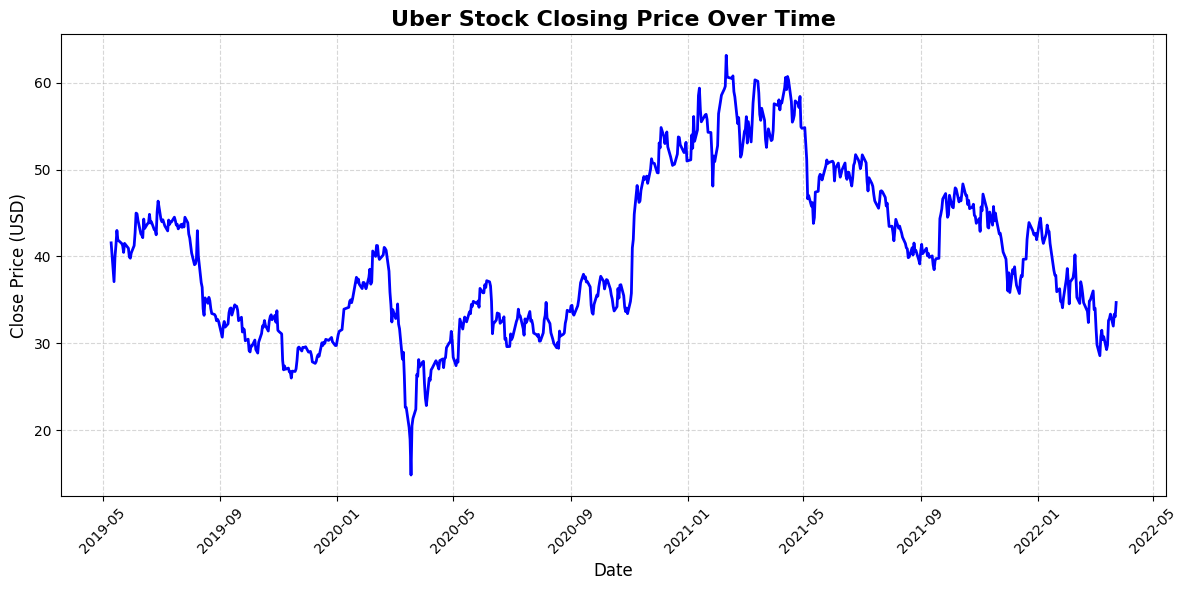

In [25]:
#Visualization 


# Closing Price Over Time
plt.figure(figsize=(12,6))
plt.plot(df["date"], df["close_price"], color="blue", linewidth=2)
plt.title("Uber Stock Closing Price Over Time", fontsize=16, fontweight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Price (USD)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

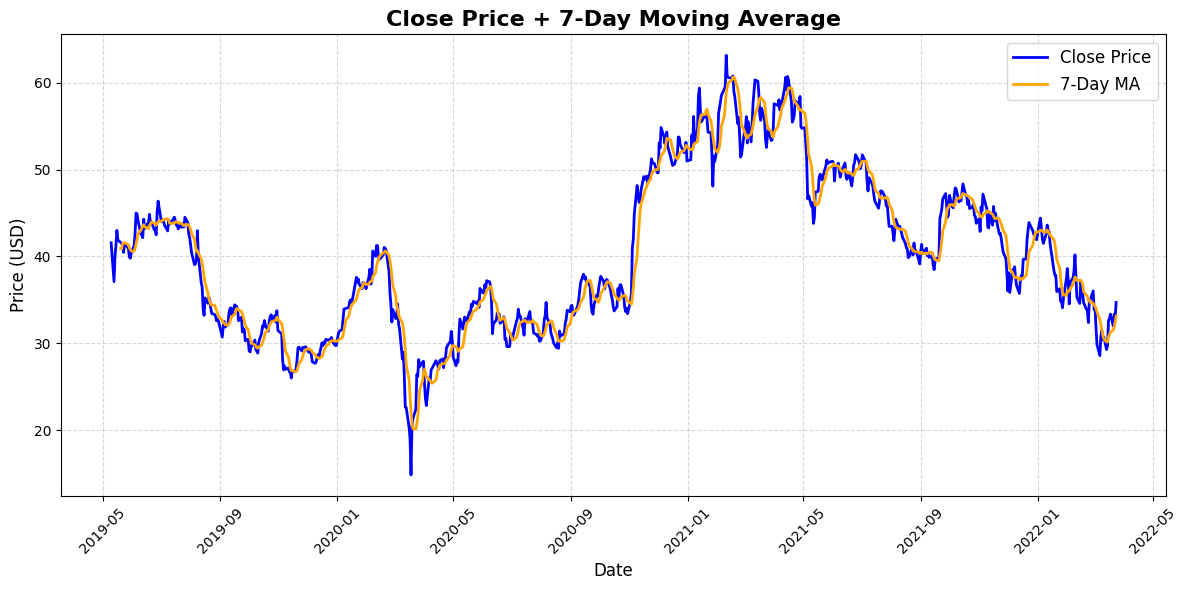

In [27]:
# Closing Price with 7-Day Moving Average


plt.figure(figsize=(12,6))
plt.plot(df["date"], df["close_price"], label="Close Price", color="blue", linewidth=2)
plt.plot(df["date"], df["ma7"], label="7-Day MA", color="orange", linewidth=2)
plt.title("Close Price + 7-Day Moving Average", fontsize=16, fontweight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

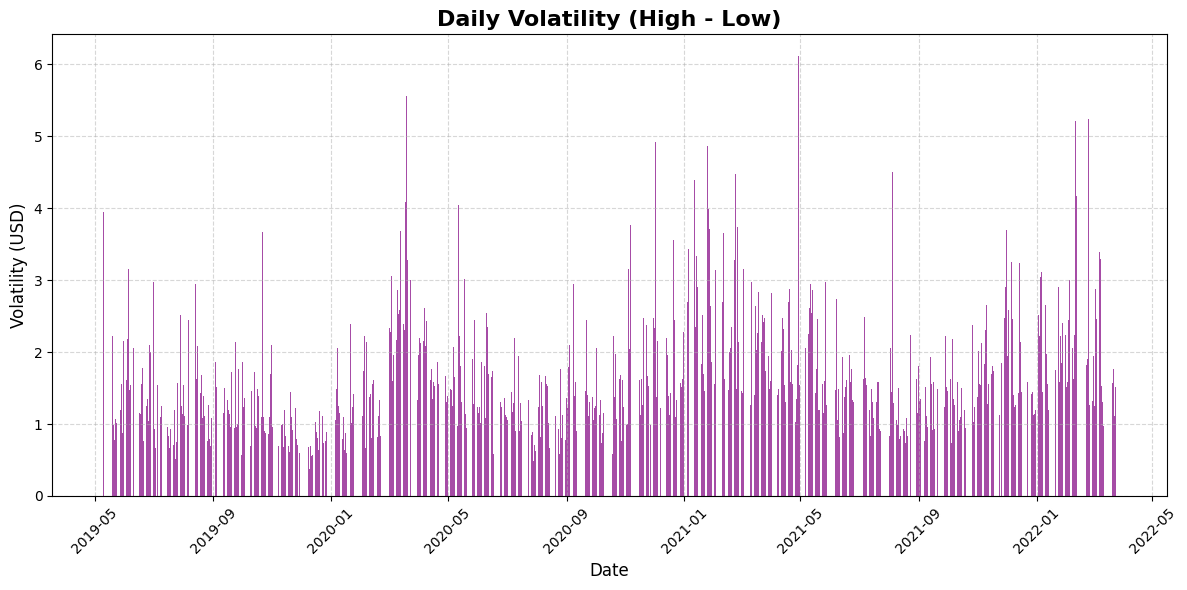

In [28]:
# Daily Volatility (High-Low)

plt.figure(figsize=(12,6))
plt.bar(df["date"], df["volatility"], color="purple", alpha=0.7)
plt.title("Daily Volatility (High - Low)", fontsize=16, fontweight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volatility (USD)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

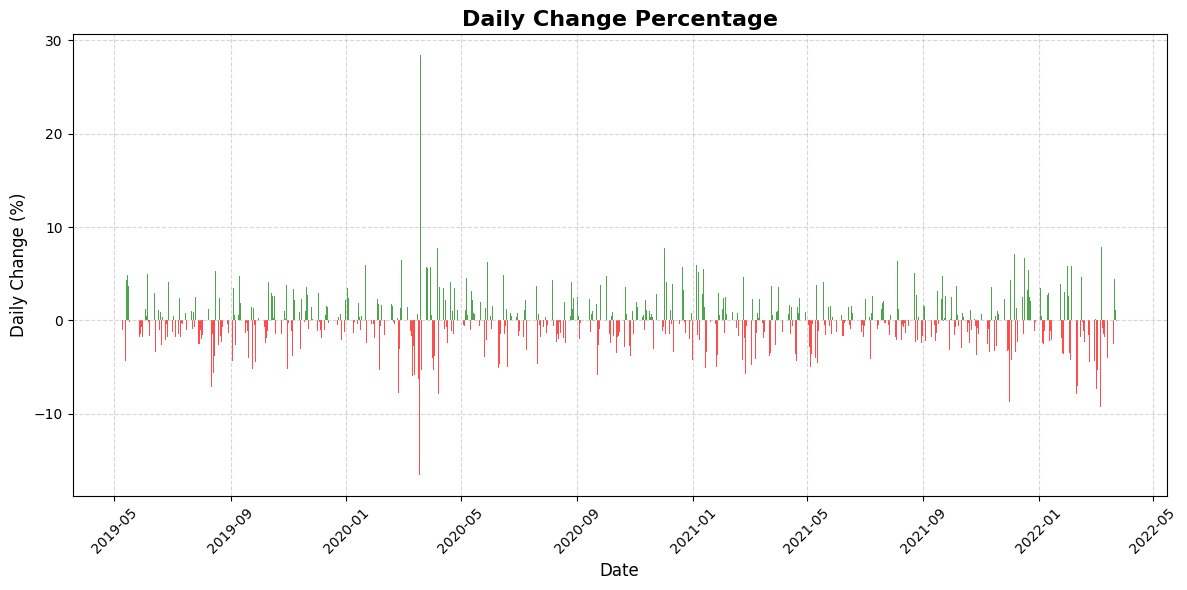

In [29]:
#Daily Change Percentage

plt.figure(figsize=(12,6))
plt.bar(df["date"], df["daily_change_pct"], color=df["daily_change_pct"].apply(lambda x: "green" if x >= 0 else "red"), alpha=0.7)
plt.title("Daily Change Percentage", fontsize=16, fontweight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Daily Change (%)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
df.to_csv(r"C:\Users\Asus\Documents\portfolio\portfolio project 2\uber_stock_ready.csv",index=False,sep=";")